# **Importing Necessary Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from warnings import filterwarnings
filterwarnings("ignore")

from google.colab import drive
from google.colab import files
drive.mount("/content/drive")

Mounted at /content/drive


# **Importing Pixel Data File**

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Etlhive/Deep Learning/CNN/digitsnpixels.csv")

In [3]:
df.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

### **We can say that our images are of 784 pixels each.**

# **Plotting first hundred images**

Note: Plotting 42000 images will take too much time.

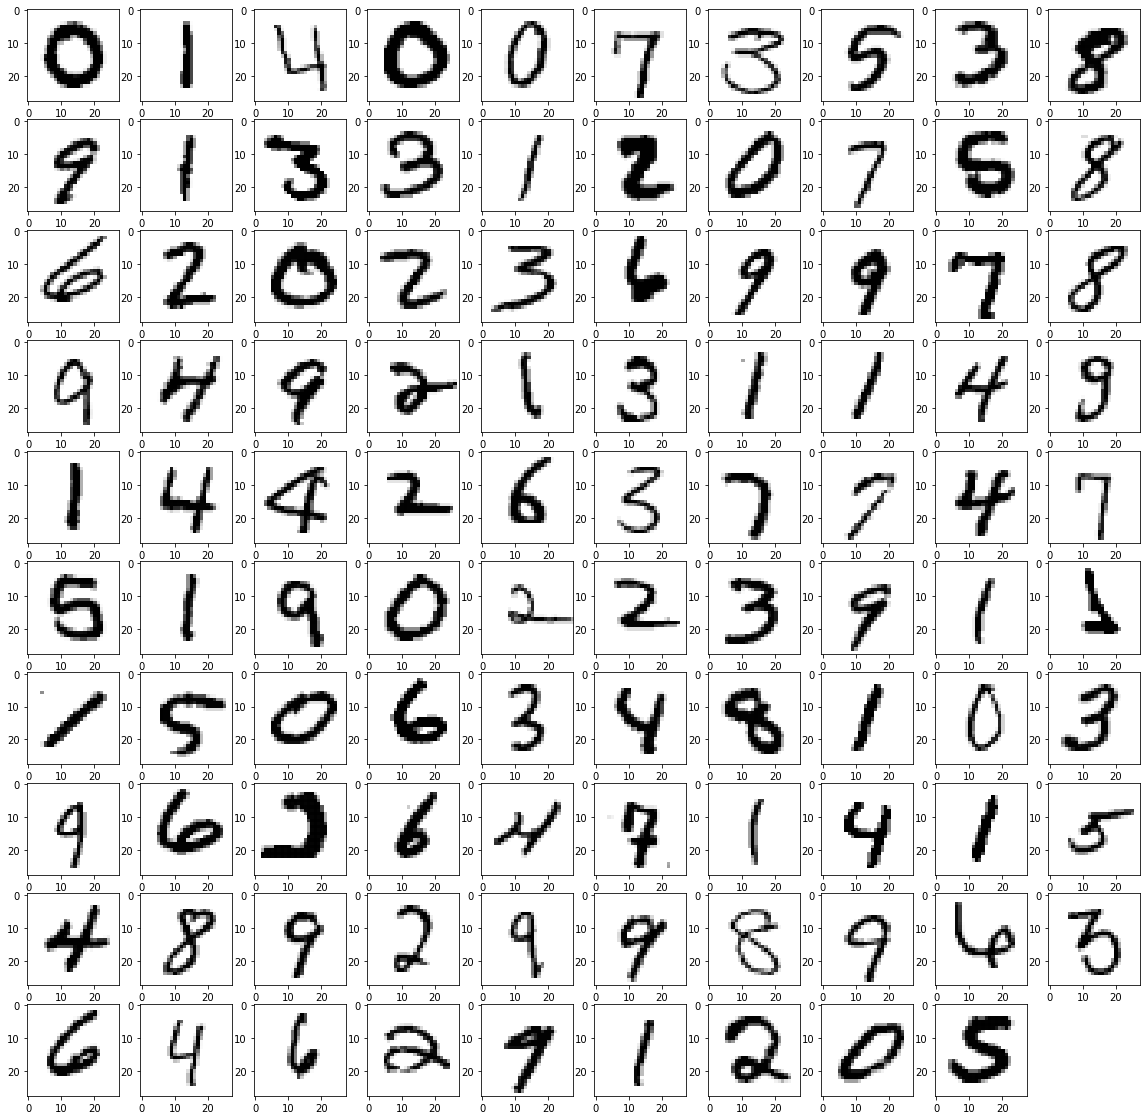

In [5]:
plt.figure(figsize=(20,20))
for i in range(1,100):
  q=df.iloc[i:i+1,1:].values
  plt.subplot(10,10,i)
  #Assuming these are square images
  #sqrt of 784 is 28
  plt.imshow(q.reshape(28,28),cmap=plt.cm.binary)

# **Defining X and Y**

In [6]:
X=df.drop(labels=["label"],axis=1)
Y=df[["label"]]

# **Preparing X and Y**

In [7]:
#Feature Scaling X

Xnew=(X/255).values

In [8]:
#One hot encoding Y

Ynew=pd.get_dummies(Y.label).values

# **Train Test Split**

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Ynew,test_size=0.2,random_state=21)

# **Reshaping xtrain & xtest**

In [10]:
print("X and Y dimesions:")
print(Xnew.shape)
print(Ynew.shape)
print("------------------------\n")
print("Training Set Shape:")
print(xtrain.shape)
print(ytrain.shape)
print("------------------------\n")
print("Testing Set Shape:")
print(xtest.shape)
print(ytest.shape)

X and Y dimesions:
(42000, 784)
(42000, 10)
------------------------

Training Set Shape:
(33600, 784)
(33600, 10)
------------------------

Testing Set Shape:
(8400, 784)
(8400, 10)


In [11]:
#Reshaping

xtrain=xtrain.reshape(33600,28,28,1)
xtest=xtest.reshape(8400,28,28,1)

# **Creating Neural Network**

In [12]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
from keras.models import Sequential
from keras.layers import Dense,Convolution2D,MaxPool2D
from keras.layers import BatchNormalization,Dropout,Flatten

In [16]:
nn=Sequential()

# 1st Convolution Layer, Max Pooling Layer
nn.add(Convolution2D(filters=20,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)))
nn.add(MaxPool2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))

# 2nd Convolution Layer, Max Pooling Layer
nn.add(Convolution2D(filters=20,kernel_size=(3,3),activation="relu"))
nn.add(MaxPool2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))

# 3rd Convolution Layer, Max Pooling Layer
nn.add(Convolution2D(filters=20,kernel_size=(3,3),activation="relu"))
nn.add(MaxPool2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))

#Flatten
nn.add(Flatten())
nn.add(Dense(10,activation="softmax"))
nn.compile(optimizer="adam",loss="categorical_crossentropy",metrics="accuracy")
model=nn.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=50,batch_size=1000)

Epoch 1/50
34/34 [==============================] - 2s 25ms/step - loss: 1.7448 - accuracy: 0.4246 - val_loss: 2.0587 - val_accuracy: 0.4724
Epoch 2/50
34/34 [==============================] - 1s 22ms/step - loss: 0.9913 - accuracy: 0.7138 - val_loss: 2.1286 - val_accuracy: 0.2074
Epoch 3/50
34/34 [==============================] - 1s 23ms/step - loss: 0.7320 - accuracy: 0.8053 - val_loss: 2.4281 - val_accuracy: 0.1630
Epoch 4/50
34/34 [==============================] - 1s 24ms/step - loss: 0.5827 - accuracy: 0.8512 - val_loss: 2.8147 - val_accuracy: 0.1136
Epoch 5/50
34/34 [==============================] - 1s 28ms/step - loss: 0.4842 - accuracy: 0.8757 - val_loss: 3.2235 - val_accuracy: 0.1063
Epoch 6/50
34/34 [==============================] - 1s 23ms/step - loss: 0.4152 - accuracy: 0.8932 - val_loss: 3.4768 - val_accuracy: 0.1063
Epoch 7/50
34/34 [==============================] - 1s 18ms/step - loss: 0.3657 - accuracy: 0.9051 - val_loss: 3.5973 - val_accuracy: 0.1063
Epoch 8/50
34

# **Predicting on test data**

## **Let's take a random row from our Pixel data.**

In [24]:
df.iloc[18:19,1:]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **Plotting this random row we just considered**

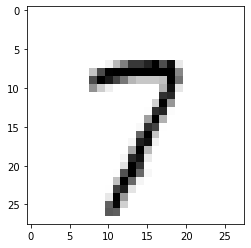

In [25]:
ts_number=df.iloc[18:19,1:].values
#Assuming these are square images
#sqrt of 784 is 28
plt.imshow(ts_number.reshape(28,28),cmap=plt.cm.binary)

## **Now, we know that our image is of Number 7.**



## **Let's try predicting this using our Neural Network Model**

In [26]:
xpred_ts=df.iloc[18:19,1:].values

In [27]:
#Feature Scaling

xpred_ts=xpred_ts/255

In [28]:
#Reshaping

xpred_ts1=xpred_ts.reshape(1,28,28,1)

In [31]:
#Predicting

Q=nn.predict(xpred_ts1)

In [32]:
Q

array([[1.15944225e-04, 4.59690782e-04, 5.02530718e-03, 4.26928309e-04,
        9.06455909e-07, 1.45974027e-05, 3.85341110e-07, 9.93283510e-01,
        3.05421527e-05, 6.42275380e-04]], dtype=float32)

## **Plotting probabilities** 

In [35]:
Q[0]

array([1.15944225e-04, 4.59690782e-04, 5.02530718e-03, 4.26928309e-04,
       9.06455909e-07, 1.45974027e-05, 3.85341110e-07, 9.93283510e-01,
       3.05421527e-05, 6.42275380e-04], dtype=float32)

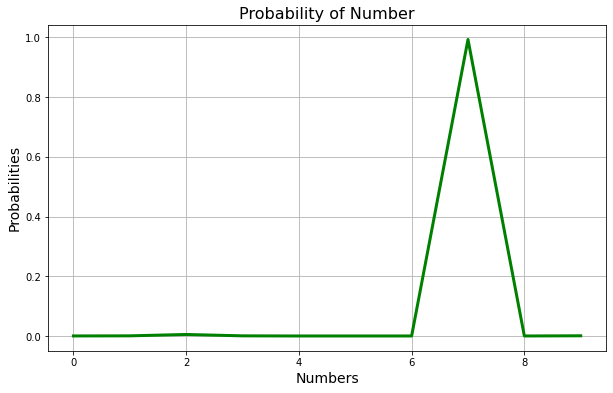

In [40]:
num=range(0,10)
plt.figure(figsize=(10,6))
plt.plot(num,Q[0],lw=3,color="green")
plt.grid(True)
plt.xlabel("Numbers",size=14)
plt.ylabel("Probabilities",size=14)
plt.title("Probability of Number",size=16);

## **Let's arrange the probabilities in a DataFrame format. So that the results are more readable.**

In [47]:
W=pd.DataFrame(Q).T
W["Label"]=range(0,10)
W.columns=["Probabilities","Label"]
W

,Probabilities,Label
0,1.159442e-04,0
1,4.596908e-04,1
2,5.025307e-03,2
3,4.269283e-04,3
4,9.064559e-07,4
5,1.459740e-05,5
6,3.853411e-07,6
7,9.932835e-01,7
8,3.054215e-05,8
9,6.422754e-04,9


## **In conclusion, from the graph and the dataframe we can say that our Neural Network model predicts accurately on testing data.**

# **Predicting on unseen data**

In [48]:
#Importing Data

B=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Etlhive/Deep Learning/CNN/test.csv")

In [49]:
B.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
B.shape

(28000, 784)

In [51]:
#Feature Scaling

Bnew=(B/255).values

In [52]:
#Reshaping

Bfinal=Bnew.reshape(28000,28,28,1)

In [65]:
len(Bfinal)

28000

In [86]:
C=nn.predict(Bfinal)

i=0
image_num=[]
while i<len(C):
  for num,prob in enumerate(C[i]):
    max_prob=max(C[i])
    if prob==max_prob:
      image_num.append(num)
  i+=1
image_num
id=range(1,28001)
Submission=pd.DataFrame(id,columns=["ImageId"])
Submission["Label"]=image_num

In [88]:
Submission.set_index("ImageId",inplace=True)

In [91]:
#Submission.to_csv("DigitReg_Submission.csv")

In [92]:
Submission

,Label
ImageId,
1,2
2,0
3,9
4,9
5,3
...,...
27996,9
27997,7
27998,3


Kaggle Score: 0.98060

Kaggle Rank: 616 (as of 26th September 2022)

# **END**